In [13]:
img_path = './datasets/cats_and_dogs_small/test/cats/cat.1900.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


In [14]:
import matplotlib.pyplot as plt

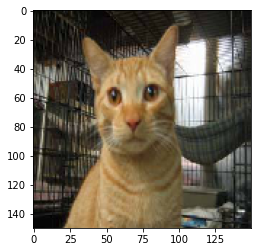

In [15]:
plt.imshow(img_tensor[0])
plt.show()

In [16]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]] # 상위 출력만 추출
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # 출력을 반환 모델

NameError: name 'model' is not defined

In [17]:
activations = activation_model.predict(img_tensor)

NameError: name 'activation_model' is not defined

In [18]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

NameError: name 'activations' is not defined

In [19]:
plt.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')
plt.show()

NameError: name 'first_layer_activation' is not defined

In [20]:
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')
plt.show()

NameError: name 'first_layer_activation' is not defined

In [21]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# 특성 맵 그리기
for layer_name, layer_activation in zip(layer_names, activations):
    # 특성 수
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]

    # 그리드 크기
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # 큰 그리드에 채움
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # 출력
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

NameError: name 'model' is not defined